In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from LQN_utils_state_save_parallel import *
import itertools
from copy import deepcopy
import sympy as sp
from itertools import groupby

In [4]:
import networkx as nx
import pynauty as nauty
import hashlib

# NetworkX 그래프 -> Nauty 그래프로 변환
def to_nauty_graph(nx_graph):
    n = nx_graph.number_of_nodes()
    g = nauty.Graph(number_of_vertices=n, directed=False)
    
    # NetworkX 그래프의 엣지를 Nauty 그래프에 추가
    for u, v in nx_graph.edges():
        g.connect_vertex(u, v)
        
    return g

# Canonical Form을 이용한 해시 생성
def canonical_hash(nx_graph):
    g = to_nauty_graph(nx_graph)        # Nauty 그래프로 변환
    cert = nauty.certificate(g)         # 정규화된 라벨의 바이트 표현 생성
    return hashlib.md5(cert).hexdigest()  # 바이트 객체를 바로 해시 반환

# # Isomorphic 그래프 중복 제거
# unique_hashes = set()
# unique_graphs = []

# for g in graph_list:
#     h = canonical_hash(g)
#     if h not in unique_hashes:
#         unique_hashes.add(h)
#         unique_graphs.append(g)

# 결과 출력
# print(f"Number of unique graphs: {len(unique_graphs)}")
# for i, g in enumerate(unique_graphs):
#     print(f"Graph {i+1}: Nodes = {list(g.nodes())}, Edges = {list(g.edges())}")



In [5]:
import networkx as nx

def graph_to_canonical_form_with_weights(graph):
    adjacency_matrix = nx.adjacency_matrix(graph, weight="weight").todense()
    return tuple(map(tuple, adjacency_matrix))

# Canonical Form 생성
#canonical_form = graph_to_canonical_form_with_weights(G)
print("Canonical Form (Weighted Graph):")
#print(canonical_form)

Canonical Form (Weighted Graph):


In [6]:
import networkx as nx
import itertools

def EPM_bipartite_graph_generator(num_system, num_ancilla, type): 
    results = []  # 결과를 저장할 리스트
    canonical_forms_seen = set()  # 중복된 Canonical Form을 저장하기 위한 set
    num_total = num_system + num_ancilla

    # Red-Blue 조합 생성
    if type == 0:
        red_blue_combinations, num_combi = list_all_combinations_with_duplication(num_system, num_ancilla)

    # Ancilla 조합 생성
    ancilla_combinations_pre = generate_combinations(num_total)
    ancilla_combinations = list(itertools.product(ancilla_combinations_pre, repeat=num_ancilla))

    # Red-Blue와 Ancilla 조합을 기반으로 그래프 생성
    for rb_comb in red_blue_combinations:
        if num_ancilla != 0:
            for bl_comb in ancilla_combinations:
                B = nx.Graph()
                B.add_nodes_from(range(2 * num_total))
                mapping = {}

                # Red-Blue 조합 추가
                for rb_index, vt in enumerate(rb_comb):
                    red = num_total + vt[0]
                    blue = num_total + vt[1]

                    B.add_edge(rb_index, red, weight=1.0)
                    B.add_edge(rb_index, blue, weight=2.0)

                    mapping[rb_index] = 'S_' + str(rb_index)
                    mapping[num_total + rb_index] = rb_index

                # Ancilla 조합 추가
                for anc_index, vt_list in enumerate(bl_comb):
                    for vt_inx in vt_list:
                        B.add_edge(num_system + anc_index, num_total + vt_inx, weight=3)

                    mapping[num_system + anc_index] = 'A_' + str(anc_index)
                    mapping[num_total + num_system + anc_index] = num_system + anc_index

                # 노드 속성 설정
                for node_index in range(2 * num_total):
                    if node_index < num_system:
                        B.nodes[node_index]['category'] = 'system_nodes'
                        B.nodes[node_index]['bipartite'] = 0
                    elif node_index < num_total:
                        B.nodes[node_index]['category'] = 'ancilla_nodes'
                        B.nodes[node_index]['bipartite'] = 0
                    else:
                        B.nodes[node_index]['category'] = 'sculpting_nodes'
                        B.nodes[node_index]['bipartite'] = 1

                B = nx.relabel_nodes(B, mapping)

                # 이웃 수 조건 확인
                if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                    canonical_form = canonical_hash(B)

                    # 중복 확인
                    if canonical_form not in canonical_forms_seen:
                        canonical_forms_seen.add(canonical_form)
                        results.append((B, canonical_form))

        else:
            B = nx.Graph()
            B.add_nodes_from(range(2 * num_total))
            mapping = {}

            # Red-Blue 조합 추가
            for rb_index, vt in enumerate(rb_comb):
                red = num_total + vt[0]
                blue = num_total + vt[1]

                B.add_edge(rb_index, red, weight=1.0)
                B.add_edge(rb_index, blue, weight=2.0)

                mapping[rb_index] = 'S_' + str(rb_index)
                mapping[num_total + rb_index] = rb_index

            # 노드 속성 설정
            for node_index in range(2 * num_total):
                if node_index < num_system:
                    B.nodes[node_index]['category'] = 'system_nodes'
                    B.nodes[node_index]['bipartite'] = 0
                elif node_index < num_total:
                    B.nodes[node_index]['category'] = 'ancilla_nodes'
                    B.nodes[node_index]['bipartite'] = 0
                else:
                    B.nodes[node_index]['category'] = 'sculpting_nodes'
                    B.nodes[node_index]['bipartite'] = 1

            B = nx.relabel_nodes(B, mapping)

                # 이웃 수 조건 확인
            if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                canonical_form = canonical_hash(B)
                    
                # 중복 확인
                if canonical_form not in canonical_forms_seen:
                    canonical_forms_seen.add(canonical_form)
                    results.append((B, canonical_form))

    return results  # 최종 결과 반환

In [7]:
bi_result_3_1 = EPM_bipartite_graph_generator(3, 1, 0)

TypeError: '<=' not supported between instances of 'int' and 'str'

In [8]:
def EPM_bipartite_graph_generator(num_system, num_ancilla, type):
    results = []  # 결과를 저장할 리스트
    canonical_forms_seen = set()  # 중복된 Canonical Form을 저장하기 위한 set
    num_total = num_system + num_ancilla

    # Red-Blue 조합 생성
    if type == 0:
        red_blue_combinations, num_combi = list_all_combinations_with_duplication(num_system, num_ancilla)
    else:
        raise ValueError("Unsupported type. Only type=0 is currently supported.")

    # Ancilla 조합 생성
    ancilla_combinations_pre = generate_combinations(num_total)
    ancilla_combinations = list(itertools.product(ancilla_combinations_pre, repeat=num_ancilla))

    for rb_comb in red_blue_combinations:
        for bl_comb in (ancilla_combinations if num_ancilla > 0 else [[]]):
            B = nx.Graph()
            B.add_nodes_from(range(2 * num_total))
            mapping = {}

            # Red-Blue 조합 추가
            for rb_index, vt in enumerate(rb_comb):
                red = num_total + vt[0]
                blue = num_total + vt[1]
                B.add_edge(rb_index, red, weight=1.0)
                B.add_edge(rb_index, blue, weight=2.0)
                mapping[rb_index] = 'S_' + str(rb_index)
                mapping[red] = rb_index

            # Ancilla 조합 추가
            for anc_index, vt_list in enumerate(bl_comb):
                for vt_inx in vt_list:
                    B.add_edge(num_system + anc_index, num_total + vt_inx, weight=3.0)
                mapping[num_system + anc_index] = 'A_' + str(anc_index)

            B = nx.relabel_nodes(B, mapping)

            # 이웃 수 조건 확인
            if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                canonical_form = graph_to_canonical_form_with_weights(B)

                # 중복 확인
                if canonical_form not in canonical_forms_seen:
                    canonical_forms_seen.add(canonical_form)
                    results.append((B, canonical_form))
    return results


In [9]:
bi_result_3_1 = EPM_bipartite_graph_generator(3, 1, 0)

In [10]:
len(bi_result_3_1)

3264

In [11]:
bi_result_3_1

[(<networkx.classes.graph.Graph at 0x7f272ee42260>,
  ((0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0),
   (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0),
   (1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
   (2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0))),
 (<networkx.classes.graph.Graph at 0x7f272ee42830>,
  ((0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0),
   (0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0),
   (1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0),
   (2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0))),
 (<networkx.classes.graph.Graph at 0x7f272ee422c0>,
  ((0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 0.0, 0

In [9]:
import networkx as nx
import pynauty as nauty
import hashlib
import itertools

# NetworkX 그래프 -> pynauty 그래프로 변환
def to_nauty_graph(nx_graph):
    nx_graph = nx.convert_node_labels_to_integers(nx_graph)  # 정수형 노드로 변환
    n = nx_graph.number_of_nodes()
    g = nauty.Graph(number_of_vertices=n, directed=False)
    for u, v in nx_graph.edges():
        g.connect_vertex(u, v)
    return g

# Canonical Form 해시 생성
def canonical_hash(nx_graph):
    try:
        g = to_nauty_graph(nx_graph)
        cert = nauty.certificate(g)
        return hashlib.md5(cert).hexdigest()
    except Exception as e:
        print(f"canonical_hash에서 오류 발생: {e}")
        return None

# 예제 그래프 생성기 (헬퍼 함수 대체용)
def example_graph_generator(num_system, num_ancilla):
    results = []
    canonical_forms_seen = set()
    
    # 테스트용 조합 생성
    combinations = [(i, j) for i in range(num_system) for j in range(num_ancilla)]
    for comb in combinations:
        B = nx.Graph()
        B.add_nodes_from(range(num_system + num_ancilla))
        B.add_edge(comb[0], num_system + comb[1])
        
        # 충분한 이웃 노드 확인
        if all(len(list(B.neighbors(node))) >= 1 for node in B.nodes):
            canonical_form = canonical_hash(B)
            if canonical_form and canonical_form not in canonical_forms_seen:
                canonical_forms_seen.add(canonical_form)
                results.append((B, canonical_form))
    
    return results


In [10]:
bi_result_3_1 = EPM_bipartite_graph_generator(3, 1, 0)

In [11]:
len(bi_result_3_1)

3264

In [12]:
bi_result_3_1

[(<networkx.classes.graph.Graph at 0x7fe8321b7cd0>,
  ((0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0),
   (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0),
   (1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
   (2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0))),
 (<networkx.classes.graph.Graph at 0x7fe8321b7490>,
  ((0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0),
   (0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0),
   (1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0),
   (2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0))),
 (<networkx.classes.graph.Graph at 0x7fe8321b6290>,
  ((0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 0.0, 0.0, 0

In [13]:
import networkx as nx
import pynauty as nauty
import hashlib

# NetworkX 그래프 -> Nauty 그래프로 변환
def to_nauty_graph(nx_graph):
    n = nx_graph.number_of_nodes()
    g = nauty.Graph(number_of_vertices=n, directed=False)
    
    # NetworkX 그래프의 엣지를 Nauty 그래프에 추가
    for u, v in nx_graph.edges():
        g.add_edge(u, v)
        
    return g

# Canonical Form을 이용한 해시 생성
def canonical_hash(nx_graph):
    g = to_nauty_graph(nx_graph)        # Nauty 그래프로 변환
    cg = nauty.canonical_labeling(g)    # 정규화된 라벨링 계산
    edges = sorted(cg.edges())          # 정규화된 그래프의 엣지 정렬
    edge_str = str(edges)               # 문자열로 변환
    return hashlib.md5(edge_str.encode()).hexdigest()  # 해시 반환

# 그래프 리스트 예제
graph_list = [
    nx.complete_bipartite_graph(3, 2),
    nx.complete_bipartite_graph(2, 3),
    nx.complete_bipartite_graph(3, 2)  # Isomorphic to the first graph
]

# Isomorphic 그래프 중복 제거
unique_hashes = set()
unique_graphs = []

for g in graph_list:
    h = canonical_hash(g)
    if h not in unique_hashes:
        unique_hashes.add(h)
        unique_graphs.append(g)

# 결과 출력
print(f"Number of unique graphs: {len(unique_graphs)}")
for i, g in enumerate(unique_graphs):
    print(f"Graph {i+1}: Nodes = {g.nodes()}, Edges = {g.edges()}")


AttributeError: 'Graph' object has no attribute 'add_edge'

In [14]:
import networkx as nx
import pynauty as nauty
import hashlib

# NetworkX 그래프 -> Nauty 그래프로 변환
def to_nauty_graph(nx_graph):
    n = nx_graph.number_of_nodes()
    edges = [(u, v) for u, v in nx_graph.edges()]
    g = nauty.Graph(number_of_vertices=n, directed=False)
    for edge in edges:
        g.connect_vertex(edge[0], edge[1])
    return g

# Canonical Form을 이용한 해시 생성
def canonical_hash(nx_graph):
    g = to_nauty_graph(nx_graph)        # Nauty 그래프로 변환
    cg = nauty.canonical_labeling(g)    # 정규화된 라벨링 계산
    # canonical_labeling의 결과를 기반으로 고유 해시 생성
    node_labels = [cg[i] for i in range(len(cg))]
    label_str = str(node_labels)
    return hashlib.md5(label_str.encode()).hexdigest()

# 그래프 리스트 예제
graph_list = [
    nx.complete_bipartite_graph(3, 2),
    nx.complete_bipartite_graph(2, 3),
    nx.complete_bipartite_graph(3, 2)  # Isomorphic to the first graph
]

# Isomorphic 그래프 중복 제거
unique_hashes = set()
unique_graphs = []

for g in graph_list:
    h = canonical_hash(g)
    if h not in unique_hashes:
        unique_hashes.add(h)
        unique_graphs.append(g)

# 결과 출력
print(f"Number of unique graphs: {len(unique_graphs)}")
for i, g in enumerate(unique_graphs):
    print(f"Graph {i+1}: Nodes = {list(g.nodes())}, Edges = {list(g.edges())}")


AttributeError: module 'pynauty' has no attribute 'canonical_labeling'

In [15]:
import networkx as nx
import pynauty as nauty
import hashlib

# NetworkX 그래프 -> pynauty 그래프로 변환
def to_nauty_graph(nx_graph):
    # NetworkX 노드를 정수형으로 변환
    nx_graph = nx.convert_node_labels_to_integers(nx_graph)
    n = nx_graph.number_of_nodes()
    g = nauty.Graph(number_of_vertices=n, directed=False)
    for u, v in nx_graph.edges():
        g.connect_vertex(u, v)
    return g

# Canonical Form 해시 생성
def canonical_hash(nx_graph):
    try:
        g = to_nauty_graph(nx_graph)
        cert = nauty.certificate(g)  # 정규화된 Canonical Form
        return hashlib.md5(cert).hexdigest()  # 해시값 반환
    except Exception as e:
        print(f"Error in canonical_hash: {e}")
        return None

# 동형성 판별 (NetworkX로 추가 확인)
def is_isomorphic(graph1, graph2):
    return nx.is_isomorphic(graph1, graph2)

# 예제 그래프 생성 및 테스트
def generate_test_graphs():
    graph1 = nx.complete_bipartite_graph(3, 2)  # K_{3,2}
    graph2 = nx.complete_bipartite_graph(2, 3)  # K_{2,3} (isomorphic to K_{3,2})
    graph3 = nx.cycle_graph(5)  # C_5 (비동형 그래프)

    graphs = [graph1, graph2, graph3]
    return graphs

# 그래프 동형성 테스트
def test_graphs():
    graphs = generate_test_graphs()
    canonical_forms = {}
    unique_graphs = []

    for i, g in enumerate(graphs):
        print(f"Graph {i + 1}: Nodes = {list(g.nodes())}, Edges = {list(g.edges())}")
        canonical_form = canonical_hash(g)
        if canonical_form not in canonical_forms:
            canonical_forms[canonical_form] = g
            unique_graphs.append(g)
        else:
            print(f"Graph {i + 1} is isomorphic to an existing graph.")

    print(f"\nUnique graphs: {len(unique_graphs)}")
    for i, g in enumerate(unique_graphs):
        print(f"Unique Graph {i + 1}: Nodes = {list(g.nodes())}, Edges = {list(g.edges())}")

# 실행
test_graphs()


Graph 1: Nodes = [0, 1, 2, 3, 4], Edges = [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]
Graph 2: Nodes = [0, 1, 2, 3, 4], Edges = [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]
Graph 2 is isomorphic to an existing graph.
Graph 3: Nodes = [0, 1, 2, 3, 4], Edges = [(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)]

Unique graphs: 2
Unique Graph 1: Nodes = [0, 1, 2, 3, 4], Edges = [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]
Unique Graph 2: Nodes = [0, 1, 2, 3, 4], Edges = [(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)]


In [16]:
import networkx as nx
import pynauty as nauty
import hashlib
import itertools

# NetworkX 그래프 -> pynauty 그래프로 변환
def to_nauty_graph(nx_graph):
    nx_graph = nx.convert_node_labels_to_integers(nx_graph)  # 정수형 노드로 변환
    n = nx_graph.number_of_nodes()
    g = nauty.Graph(number_of_vertices=n, directed=False)
    for u, v in nx_graph.edges():
        g.connect_vertex(u, v)
    return g

# Canonical Form 해시 생성
def canonical_hash(nx_graph):
    try:
        g = to_nauty_graph(nx_graph)
        cert = nauty.certificate(g)  # Canonical Form 생성
        return hashlib.md5(cert).hexdigest()  # 해시값 반환
    except Exception as e:
        print(f"Error in canonical_hash: {e}")
        return None

# EPM Bipartite Graph Generator
def EPM_bipartite_graph_generator(num_system, num_ancilla, type): 
    results = []  # 결과를 저장할 리스트
    canonical_forms_seen = set()  # 중복된 Canonical Form을 저장하기 위한 set
    num_total = num_system + num_ancilla

    # Red-Blue 조합 생성
    if type == 0:
        red_blue_combinations, num_combi = list_all_combinations_with_duplication(num_system, num_ancilla)

    # Ancilla 조합 생성
    ancilla_combinations_pre = generate_combinations(num_total)
    ancilla_combinations = list(itertools.product(ancilla_combinations_pre, repeat=num_ancilla))

    # Red-Blue와 Ancilla 조합을 기반으로 그래프 생성
    for rb_comb in red_blue_combinations:
        if num_ancilla != 0:
            for bl_comb in ancilla_combinations:
                B = nx.Graph()
                B.add_nodes_from(range(2 * num_total))
                mapping = {}

                # Red-Blue 조합 추가
                for rb_index, vt in enumerate(rb_comb):
                    red = num_total + vt[0]
                    blue = num_total + vt[1]

                    B.add_edge(rb_index, red, weight=1.0)
                    B.add_edge(rb_index, blue, weight=2.0)

                    mapping[rb_index] = 'S_' + str(rb_index)
                    mapping[num_total + rb_index] = rb_index

                # Ancilla 조합 추가
                for anc_index, vt_list in enumerate(bl_comb):
                    for vt_inx in vt_list:
                        B.add_edge(num_system + anc_index, num_total + vt_inx, weight=3)

                    mapping[num_system + anc_index] = 'A_' + str(anc_index)
                    mapping[num_total + num_system + anc_index] = num_system + anc_index

                # 노드 속성 설정
                for node_index in range(2 * num_total):
                    if node_index < num_system:
                        B.nodes[node_index]['category'] = 'system_nodes'
                        B.nodes[node_index]['bipartite'] = 0
                    elif node_index < num_total:
                        B.nodes[node_index]['category'] = 'ancilla_nodes'
                        B.nodes[node_index]['bipartite'] = 0
                    else:
                        B.nodes[node_index]['category'] = 'sculpting_nodes'
                        B.nodes[node_index]['bipartite'] = 1

                B = nx.relabel_nodes(B, mapping)

                # 이웃 수 조건 확인
                if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                    canonical_form = canonical_hash(B)

                    # 중복 확인
                    if canonical_form and canonical_form not in canonical_forms_seen:
                        canonical_forms_seen.add(canonical_form)
                        results.append((B, canonical_form))

        else:
            B = nx.Graph()
            B.add_nodes_from(range(2 * num_total))
            mapping = {}

            # Red-Blue 조합 추가
            for rb_index, vt in enumerate(rb_comb):
                red = num_total + vt[0]
                blue = num_total + vt[1]

                B.add_edge(rb_index, red, weight=1.0)
                B.add_edge(rb_index, blue, weight=2.0)

                mapping[rb_index] = 'S_' + str(rb_index)
                mapping[num_total + rb_index] = rb_index

            # 노드 속성 설정
            for node_index in range(2 * num_total):
                if node_index < num_system:
                    B.nodes[node_index]['category'] = 'system_nodes'
                    B.nodes[node_index]['bipartite'] = 0
                elif node_index < num_total:
                    B.nodes[node_index]['category'] = 'ancilla_nodes'
                    B.nodes[node_index]['bipartite'] = 0
                else:
                    B.nodes[node_index]['category'] = 'sculpting_nodes'
                    B.nodes[node_index]['bipartite'] = 1

            B = nx.relabel_nodes(B, mapping)

            # 이웃 수 조건 확인
            if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                canonical_form = canonical_hash(B)

                # 중복 확인
                if canonical_form and canonical_form not in canonical_forms_seen:
                    canonical_forms_seen.add(canonical_form)
                    results.append((B, canonical_form))

    return results  # 최종 결과 반환


In [17]:
bi_result_3_1 = EPM_bipartite_graph_generator(3, 1, 0)

In [18]:
len(bi_result_3_1)

8

In [19]:
bi_result_3_1[0]

(<networkx.classes.graph.Graph at 0x7fe82b21e3e0>,
 '87e07f47d39141dcd1b8141fcbed9e41')

In [20]:
bi_result_3_1[0][0]

In [21]:
bi_result_3_1[0][1]

'87e07f47d39141dcd1b8141fcbed9e41'

In [22]:
bi_result_3_1[1][1]

'c6de2a6d3c934078d5e619060f2122d6'

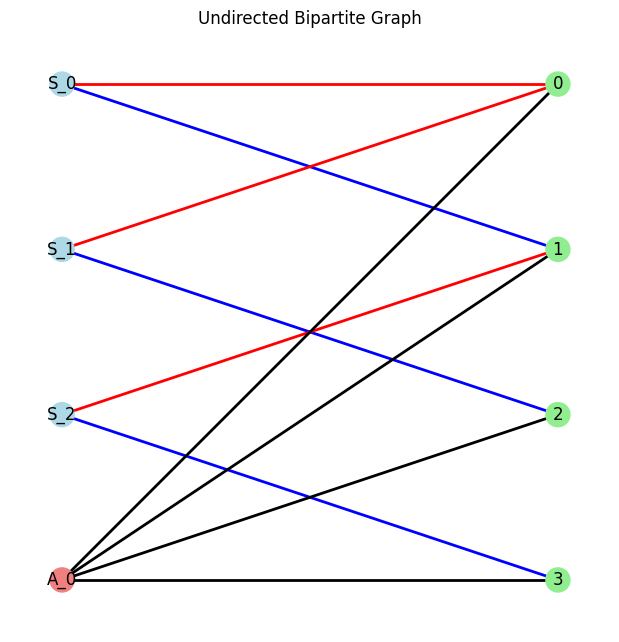

In [32]:
Draw_EPM_bipartite_graph(bi_result_3_1[7][0])

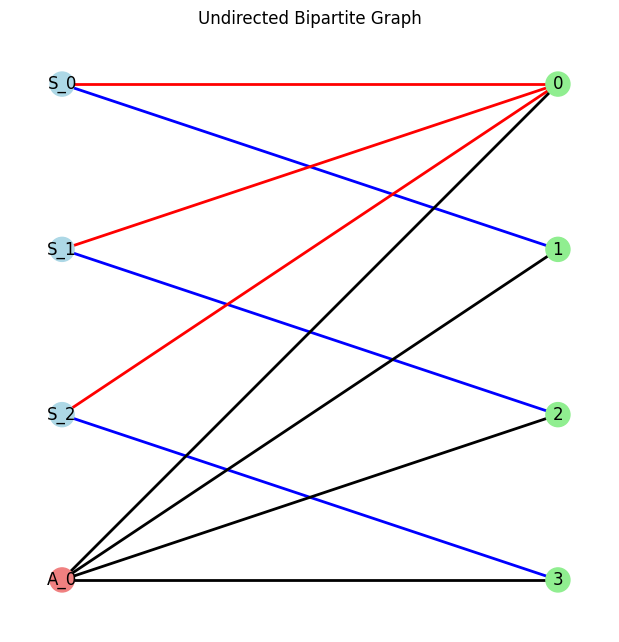

In [35]:
Draw_EPM_bipartite_graph(bi_result_3_1[4][0])

In [36]:
import networkx as nx

# 두 개의 동형 그래프 생성
graph1 = nx.complete_bipartite_graph(3, 2)
graph2 = nx.complete_bipartite_graph(2, 3)

# Canonical Hash 계산
hash1 = canonical_hash(graph1)
hash2 = canonical_hash(graph2)

print(f"Hash1: {hash1}")
print(f"Hash2: {hash2}")
print(f"Are the graphs isomorphic? {hash1 == hash2}")


Hash1: 3d2911e526d9d9fde3fdddd1a612f9e2
Hash2: 3d2911e526d9d9fde3fdddd1a612f9e2
Are the graphs isomorphic? True


In [37]:
# 비동형 그래프 생성
graph3 = nx.cycle_graph(5)

# Canonical Hash 계산
hash3 = canonical_hash(graph3)

print(f"Hash1: {hash1}")
print(f"Hash3: {hash3}")
print(f"Are the graphs isomorphic? {hash1 == hash3}")

Hash1: 3d2911e526d9d9fde3fdddd1a612f9e2
Hash3: ac8adb5e4123cb838227a9c27e38ab07
Are the graphs isomorphic? False


In [38]:
def EPM_bipartite_graph_generator_old(num_system, num_ancilla, type): 
    results = []  # 결과를 저장할 리스트
    num_total = num_system + num_ancilla

    if type == 0:
        red_blue_combinations, num_combi = list_all_combinations_with_duplication(num_system, num_ancilla)

    ancilla_combinations_pre = generate_combinations(num_total)
    ancilla_combinations = list(itertools.product(ancilla_combinations_pre, repeat=num_ancilla))

    for rb_comb in red_blue_combinations:
        if num_ancilla != 0:
            for bl_comb in ancilla_combinations:
                B = nx.Graph()
                B.add_nodes_from(range(2 * num_total))
                mapping = {}

                for rb_index, vt in enumerate(rb_comb):
                    red = num_total + vt[0]
                    blue = num_total + vt[1]

                    B.add_edge(rb_index, red, weight= 1.0)
                    B.add_edge(rb_index, blue, weight= 2.0)

                    mapping[rb_index] = 'S_' + str(rb_index)  # mapping은 그래프 index임(bigraph에서 왼쪽)
                    mapping[num_total + rb_index] = rb_index  # bigraph에서 오른쪽 vertex


                for anc_index, vt_list in enumerate(bl_comb):
                    for vt_inx in vt_list:
                        B.add_edge(num_system + anc_index, num_total + vt_inx, weight=3) 

                    mapping[num_system + anc_index] = 'A_' + str(anc_index)
                    mapping[num_total + num_system + anc_index] = num_system + anc_index

                for node_index in range(2 * num_total):
                    if node_index < num_system:
                        B.nodes[node_index]['category'] = 'system_nodes'
                        B.nodes[node_index]['bipartite'] = 0
                    elif node_index < num_total:
                        B.nodes[node_index]['category'] = 'ancilla_nodes'
                        B.nodes[node_index]['bipartite'] = 0
                    else:
                        B.nodes[node_index]['category'] = 'sculpting_nodes'
                        B.nodes[node_index]['bipartite'] = 1

                B = nx.relabel_nodes(B, mapping)  # B의 index를 mapping에서 우리가 만든 형태로 다 바꿈.

                if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                    results.append((B))
        else:
            B = nx.Graph()
            B.add_nodes_from(range(2 * num_total))
            mapping = {}

            for rb_index, vt in enumerate(rb_comb):
                red = num_total + vt[0]
                blue = num_total + vt[1]

                B.add_edge(rb_index, red, weight=1.)
                B.add_edge(rb_index, blue, weight= 2.)

                mapping[rb_index] = 'S_' + str(rb_index)
                mapping[num_total + rb_index] = rb_index

            for node_index in range(2 * num_total):
                if node_index < num_system:
                    B.nodes[node_index]['category'] = 'system_nodes'
                    B.nodes[node_index]['bipartite'] = 0
                elif node_index < num_total:
                    B.nodes[node_index]['category'] = 'ancilla_nodes'
                    B.nodes[node_index]['bipartite'] = 0
                else:
                    B.nodes[node_index]['category'] = 'sculpting_nodes'
                    B.nodes[node_index]['bipartite'] = 1

            B = nx.relabel_nodes(B, mapping)

            if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                results.append((B))

    return results  # 최종 결과 반환

In [45]:
bi_result_old_3_1 = EPM_bipartite_graph_generator_old(3, 1, 0)

In [49]:
bi_result_old_3_1[0]

In [53]:
canonical_hash(bi_result_old_3_1[0])

'87e07f47d39141dcd1b8141fcbed9e41'

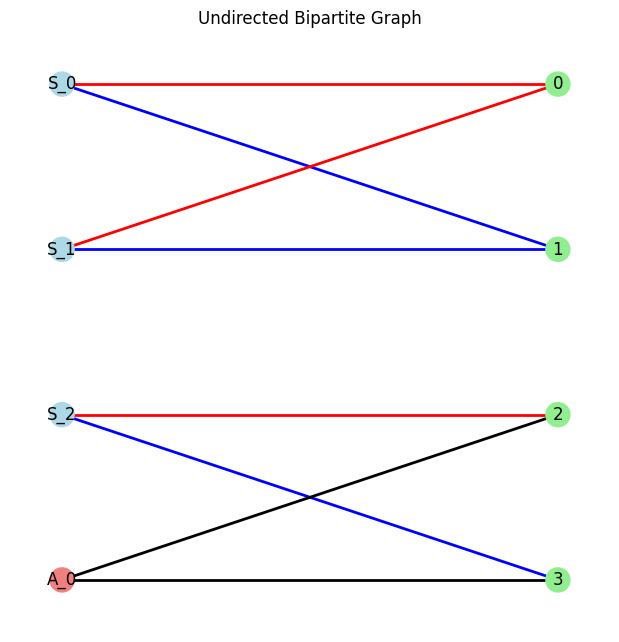

In [50]:
Draw_EPM_bipartite_graph(bi_result_old_3_1[0])

In [54]:
canonical_hash(bi_result_old_3_1[4])

'87e07f47d39141dcd1b8141fcbed9e41'

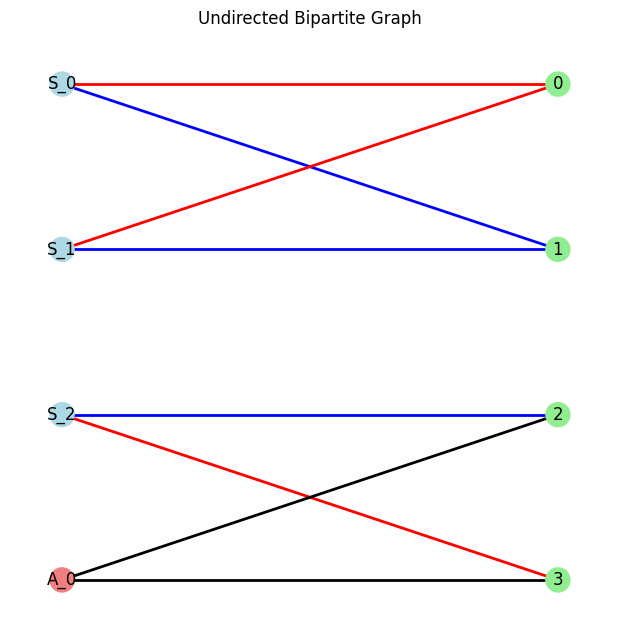

In [52]:
Draw_EPM_bipartite_graph(bi_result_old_3_1[4])

In [60]:
import networkx as nx
import pynauty as nauty
import hashlib
import itertools
from collections import defaultdict

# NetworkX 그래프 -> pynauty 그래프로 변환
def to_nauty_graph(nx_graph):
    nx_graph = nx.convert_node_labels_to_integers(nx_graph)  # 정수형 노드로 변환
    n = nx_graph.number_of_nodes()
    g = nauty.Graph(number_of_vertices=n, directed=False)
    for u, v in nx_graph.edges():
        g.connect_vertex(u, v)
    return g

# Canonical Form 해시 생성
def canonical_hash(nx_graph):
    try:
        g = to_nauty_graph(nx_graph)
        cert = nauty.certificate(g)  # Canonical Form 생성
        return hashlib.md5(cert).hexdigest()  # 해시값 반환
    except Exception as e:
        print(f"Error in canonical_hash: {e}")
        return None

# EPM Bipartite Graph Generator
def EPM_bipartite_graph_generator_test(num_system, num_ancilla, type): 
    results = defaultdict(list)  # Canonical Hash별로 그래프를 그룹화
    num_total = num_system + num_ancilla

    # Red-Blue 조합 생성
    if type == 0:
        red_blue_combinations, num_combi = list_all_combinations_with_duplication(num_system, num_ancilla)

    # Ancilla 조합 생성
    ancilla_combinations_pre = generate_combinations(num_total)
    ancilla_combinations = list(itertools.product(ancilla_combinations_pre, repeat=num_ancilla))

    # Red-Blue와 Ancilla 조합을 기반으로 그래프 생성
    for rb_comb in red_blue_combinations:
        if num_ancilla != 0:
            for bl_comb in ancilla_combinations:
                B = nx.Graph()
                B.add_nodes_from(range(2 * num_total))
                mapping = {}

                # Red-Blue 조합 추가
                for rb_index, vt in enumerate(rb_comb):
                    red = num_total + vt[0]
                    blue = num_total + vt[1]

                    B.add_edge(rb_index, red, weight=1.0)
                    B.add_edge(rb_index, blue, weight=2.0)

                    mapping[rb_index] = 'S_' + str(rb_index)
                    mapping[num_total + rb_index] = rb_index

                # Ancilla 조합 추가
                for anc_index, vt_list in enumerate(bl_comb):
                    for vt_inx in vt_list:
                        B.add_edge(num_system + anc_index, num_total + vt_inx, weight=3)

                    mapping[num_system + anc_index] = 'A_' + str(anc_index)
                    mapping[num_total + num_system + anc_index] = num_system + anc_index

                # 노드 속성 설정
                for node_index in range(2 * num_total):
                    if node_index < num_system:
                        B.nodes[node_index]['category'] = 'system_nodes'
                        B.nodes[node_index]['bipartite'] = 0
                    elif node_index < num_total:
                        B.nodes[node_index]['category'] = 'ancilla_nodes'
                        B.nodes[node_index]['bipartite'] = 0
                    else:
                        B.nodes[node_index]['category'] = 'sculpting_nodes'
                        B.nodes[node_index]['bipartite'] = 1

                B = nx.relabel_nodes(B, mapping)

                # 이웃 수 조건 확인
                if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                    canonical_form = canonical_hash(B)

                    # 그룹화
                    if canonical_form:
                        results[canonical_form].append(B)

        else:
            B = nx.Graph()
            B.add_nodes_from(range(2 * num_total))
            mapping = {}

            # Red-Blue 조합 추가
            for rb_index, vt in enumerate(rb_comb):
                red = num_total + vt[0]
                blue = num_total + vt[1]

                B.add_edge(rb_index, red, weight=1.0)
                B.add_edge(rb_index, blue, weight=2.0)

                mapping[rb_index] = 'S_' + str(rb_index)
                mapping[num_total + rb_index] = rb_index

            # 노드 속성 설정
            for node_index in range(2 * num_total):
                if node_index < num_system:
                    B.nodes[node_index]['category'] = 'system_nodes'
                    B.nodes[node_index]['bipartite'] = 0
                elif node_index < num_total:
                    B.nodes[node_index]['category'] = 'ancilla_nodes'
                    B.nodes[node_index]['bipartite'] = 0
                else:
                    B.nodes[node_index]['category'] = 'sculpting_nodes'
                    B.nodes[node_index]['bipartite'] = 1

            B = nx.relabel_nodes(B, mapping)

            # 이웃 수 조건 확인
            if all(len(list(B.neighbors(node))) >= 2 for node in B.nodes):
                canonical_form = canonical_hash(B)

                # 그룹화
                if canonical_form:
                    results[canonical_form].append(B)

    return results  # Canonical Hash별로 그룹화된 결과 반환


In [61]:
bi_result_test_3_1 = EPM_bipartite_graph_generator_test(3, 1, 0)

In [65]:
list(bi_result_test_3_1.keys())[0]

'87e07f47d39141dcd1b8141fcbed9e41'

In [68]:
bi_result_test_3_1[list(bi_result_test_3_1.keys())[0]][0]

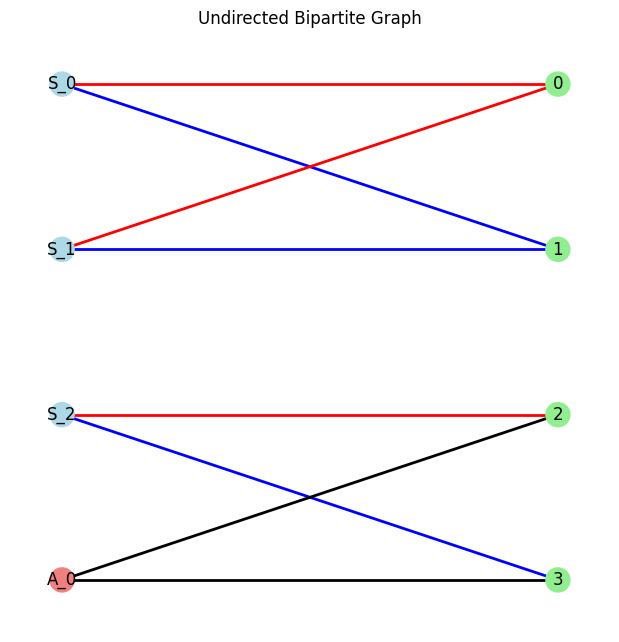

In [69]:
Draw_EPM_bipartite_graph(bi_result_test_3_1[list(bi_result_test_3_1.keys())[0]][0])

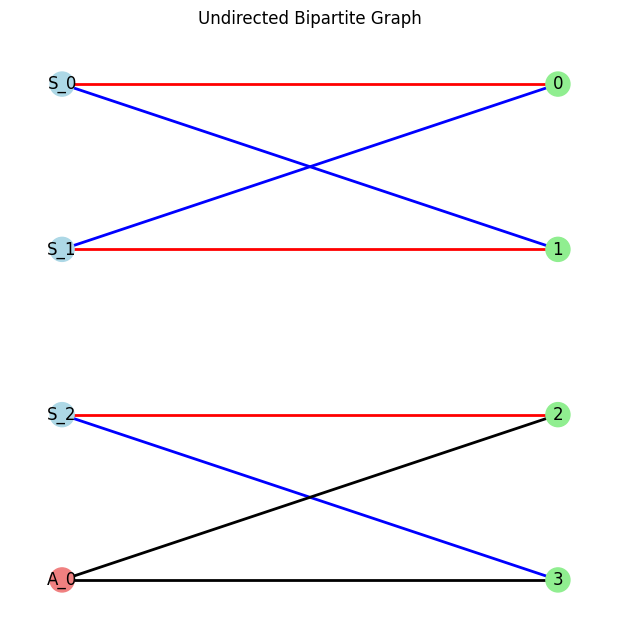

In [71]:
Draw_EPM_bipartite_graph(bi_result_test_3_1[list(bi_result_test_3_1.keys())[0]][2])

In [76]:
bi_result_test_3_1[list(bi_result_test_3_1.keys())[0]][0]